<a href="https://colab.research.google.com/github/Atrib99/Python_Projects/blob/master/Dynamic_Support_and_Resistance_Levels_An_Automated_Approach_to_Stock_Analysis_with_Recomendation_bot_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install yfinance
import yfinance as yf
import datetime

In [24]:
def get_stock_data(ticker, start_date, end_date):
    """
    Fetch historical stock data using YFinance.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def get_company_info(ticker):
    """
    Fetch fundamental details of the company using YFinance.
    """
    company_info = yf.Ticker(ticker).info
    return company_info

def analyze_stock(stock_data):
    """
    Perform basic analysis on the stock data.
    """
    # Example: Calculate moving average
    stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['MA200'] = stock_data['Close'].rolling(window=200).mean()
    return stock_data

def generate_investment_call(ticker):
    """
    Generate investment call based on analysis.
    """
    stock_data = get_stock_data(ticker, datetime.datetime.now() - datetime.timedelta(days=365), datetime.datetime.now())
    company_info = get_company_info(ticker)
    analyzed_data = analyze_stock(stock_data)

    # Example: Check if the current price is above 50-day and 200-day moving averages
    if analyzed_data['Close'][-1] > analyzed_data['MA50'][-1] and analyzed_data['Close'][-1] > analyzed_data['MA200'][-1]:
        return f"BUY recommendation for {ticker}. Current Price: {analyzed_data['Close'][-1]}, 50-Day MA: {analyzed_data['MA50'][-1]}, 200-Day MA: {analyzed_data['MA200'][-1]}. Company Profile: {company_info}"
    else:
        return f"HOLD recommendation for {ticker}. Current Price: {analyzed_data['Close'][-1]}, 50-Day MA: {analyzed_data['MA50'][-1]}, 200-Day MA: {analyzed_data['MA200'][-1]}. Company Profile: {company_info}"

In [48]:
!pip install mplfinance
import mplfinance as mpf
import numpy as np

In [45]:
# Get historical data for a stock
ticker = 'RELIANCE.NS'  # Ticker symbol for Reliance Industries on NSE
data = yf.download(ticker, start='2024-01-16', end='2024-02-16')

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


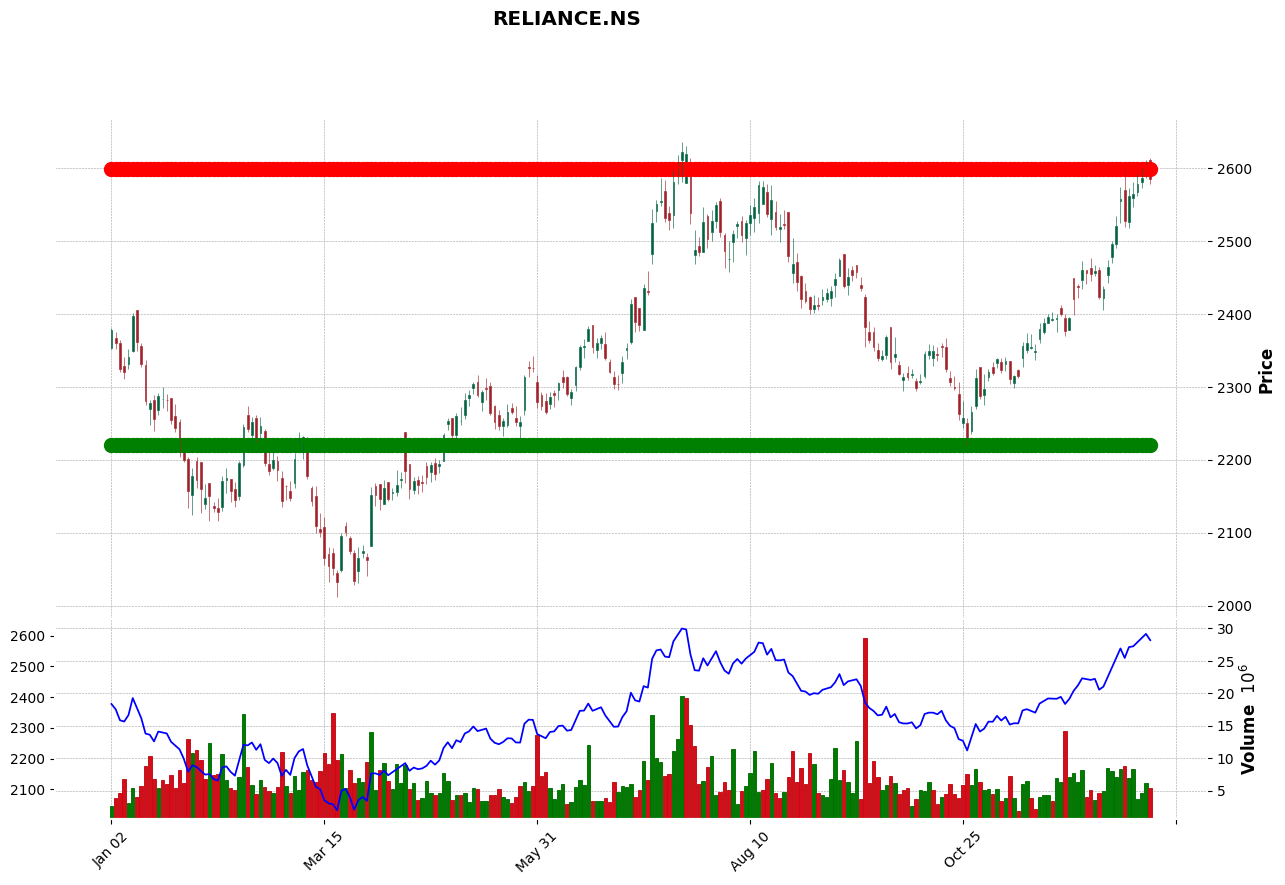

In [52]:
def get_support_resistance(data):
    """
    Calculate support and resistance levels.
    """
    # Calculate local minima and maxima
    minima_idx = np.where((data['Low'].shift(1) > data['Low']) & (data['Low'].shift(-1) > data['Low']))[0]
    maxima_idx = np.where((data['High'].shift(1) < data['High']) & (data['High'].shift(-1) < data['High']))[0]

    # Find the lowest low and highest high within the specified window
    window = 20
    support = data.iloc[minima_idx[-window:]]['Low'].min()
    resistance = data.iloc[maxima_idx[-window:]]['High'].max()

    return support, resistance

# Get historical data for a stock
ticker = 'RELIANCE.NS'  # Ticker symbol for Reliance Industries on NSE
data = yf.download(ticker, start='2023-01-01', end='2024-01-01')

# Calculate support and resistance levels
support, resistance = get_support_resistance(data)
# Create arrays of the same length as the data with support and resistance levels
support_array = np.full(len(data), support)
resistance_array = np.full(len(data), resistance)

# Plot candlestick chart with support and resistance levels
mpf.plot(data, type='candle', style='charles', title=ticker, ylabel='Price', volume=True,
         addplot=[mpf.make_addplot(data['Close'], color='b', panel=1),
                  mpf.make_addplot(support_array, scatter=True, markersize=100, marker='o', color='g'),
                  mpf.make_addplot(resistance_array, scatter=True, markersize=100, marker='o', color='r')],
         figratio=(16, 8), figsize=(16, 10))


In [53]:
# Example usage:
ticker = 'RELIANCE.NS'  # Ticker symbol for Reliance Industries on NSE
investment_call = generate_investment_call(ticker)
print(investment_call)

[*********************100%%**********************]  1 of 1 completed

BUY recommendation for RELIANCE.NS. Current Price: 2941.199951171875, 50-Day MA: 2674.8230029296874, 200-Day MA: 2454.7804748535154. Company Profile: {'address1': 'Maker Chambers IV', 'address2': '3rd Floor 222 Nariman Point', 'city': 'Mumbai', 'zip': '400021', 'country': 'India', 'phone': '91 22 3555 5000', 'fax': '91 22 2204 2268', 'website': 'https://www.ril.com', 'industry': 'Oil & Gas Refining & Marketing', 'industryKey': 'oil-gas-refining-marketing', 'industryDisp': 'Oil & Gas Refining & Marketing', 'sector': 'Energy', 'sectorKey': 'energy', 'sectorDisp': 'Energy', 'longBusinessSummary': 'Reliance Industries Limited engages in hydrocarbon exploration and production, oil and chemicals, textile, retail, digital, material and composites, renewables, and financial services businesses worldwide. The company produces and markets petroleum products, such as liquefied petroleum gas, propylene, naphtha, gasoline, jet/aviation turbine fuel, kerosene oil, diesel, Sulphur, and petroleum coke